Data Science

Logan Wongbangchuad,
Seth Boggess,
Johnny Woehrle

Import pandas, seaborn, numpy, and matplotlib.pyplot

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


read both datasets from the github url

In [ ]:
url = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/NCHS_-_Leading_Causes_of_Death__United_States.csv"
df = pd.read_csv(url)

url2 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/historical_state_population_by_year.csv"
PopulationDf = pd.read_csv(url2)

In [ ]:
PopulationDf.head()

,State,Year,Population
0,Alaska,1950,135000
1,Alaska,1951,158000
2,Alaska,1952,189000
3,Alaska,1953,205000
4,Alaska,1954,215000


# (1) Identify numerical and categorical features in your dataset and list them out with their ranges and category values.

Here we identified the minimum and maximum values of all the numerical values in our data sets

In [ ]:
min_value = df['Year'].min()
max_value = df['Year'].max()
print("Year range")
print(min_value)
print(max_value)

min_value = df['Deaths'].min()
max_value = df['Deaths'].max()
print("Deaths range")
print(min_value)
print(max_value)

min_value = df['Age-adjusted Death Rate'].min()
max_value = df['Age-adjusted Death Rate'].max()
print("Age Adjusted Death Rate range")
print(min_value)
print(max_value)

min_value = PopulationDf['Population'].min()
max_value = PopulationDf['Population'].max()
print("Population Range")
print(min_value)
print(max_value)

Year range
1999
2017
Deaths range
21
2813503
Age Adjusted Death Rate range
2.6
1087.3
Population Range
43000
39512223


Numerical Features:


1.  Year: 1999-2017

2.  Deaths: 21-2813503

3.  Age-adjusted Death Rate: 2.6-1087.3

4.  Cause Name Encoded Numerically: 0-9

5.  Population: 43000 - 39512223


* 113 Cause Name: Accidents (unintentional injuries) (V01-X59,Y85-Y86), All Causes, Alzheimer's disease (G30), Cerebrovascular diseases (I60-I69), Chronic lower respiratory diseases (J40-J47), Diabetes mellitus (E10-E14), Diseases of heart (I00-I09,I11,I13,I20-I51), Influenza and pneumonia (J09-J18), Intentional self-harm (suicide) (*U03,X60-X84,Y87.0), Malignant neoplasms (C00-C97) ,Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27).

* Cause Name: Unintentional Injuries, all causes, Alzheimer's disease, stroke, CLRD, Diabetes, Heart Disease, Influenza and pneumonia, Suicide, Cancer, Kidney disease.

* State: Unites States, (All 50 states)s

**Age-adjusted Death Rate**: An age-adjusted death rate is a measure used to compare the mortality rates of populations that may have different age structures. It is important because age is a big factor in mortality rates, older populations tend to have higher death rates, and younger populations tend to have lower death rates. Age-adjusting allows for fair comparisons across populations with different age distributions.

# (2) Show an example of each of the following single feature plots on your dataset. Explain the results of each plot briefly.

**Pd.merge(df, PopulationDf, on=['State', 'Year'], how='inner')**
* We used this to merge the original dataset with the population dataset so that we could add an extra feature to the overall data.

In [ ]:
df = pd.merge(df, PopulationDf, on=['State', 'Year'], how='inner')
df.drop('113 Cause Name', axis=1, inplace=True)
print (df)

       Year              Cause Name          State  Deaths  \
0      2017  Unintentional injuries        Alabama    2703   
1      2017  Unintentional injuries         Alaska     436   
2      2017  Unintentional injuries        Arizona    4184   
3      2017  Unintentional injuries       Arkansas    1625   
4      2017  Unintentional injuries     California   13840   
...     ...                     ...            ...     ...   
10654  1999          Kidney disease       Virginia    1035   
10655  1999          Kidney disease     Washington     278   
10656  1999          Kidney disease  West Virginia     345   
10657  1999          Kidney disease      Wisconsin     677   
10658  1999          Kidney disease        Wyoming      30   

       Age-adjusted Death Rate  Population  
0                         53.8     4874486  
1                         63.7      739700  
2                         56.2     7044008  
3                         51.8     3001345  
4                         33.2

As we can see, population is now part of the dataset!

Below we created a copy dataset, except ot eliminated all the rows that contained "United States" and "District of Columbia" as states and contained "All causes" in the cause name column.

Lastly we created a dataframe that summed up the deaths per year

In [ ]:
# Filter data for specific causes and exclude overall United States data
causesDf = df[df['State'] != 'United States']
causesDf = causesDf[causesDf['State'] != 'District of Columbia']
# Deleting rows where 'cause_name' is 'all causes'
causesDf = causesDf[causesDf['Cause Name'] != 'All causes']

# Group by year and sum the deaths for each year
yearlyDeathsDf = causesDf.groupby("Year")["Deaths"].sum().reset_index()

**Histogram Plot**
*   Create a histogram with a DataFrame of the deaths and years excluding the "all causes" and "United States" criterion. We then summate the deaths per year into a separate DataFrame then create the histoplot with years as the X axis, Deaths as the weights and using the data set yearlyDeathsDf. Lastly we display the data with a title, x, and y label.




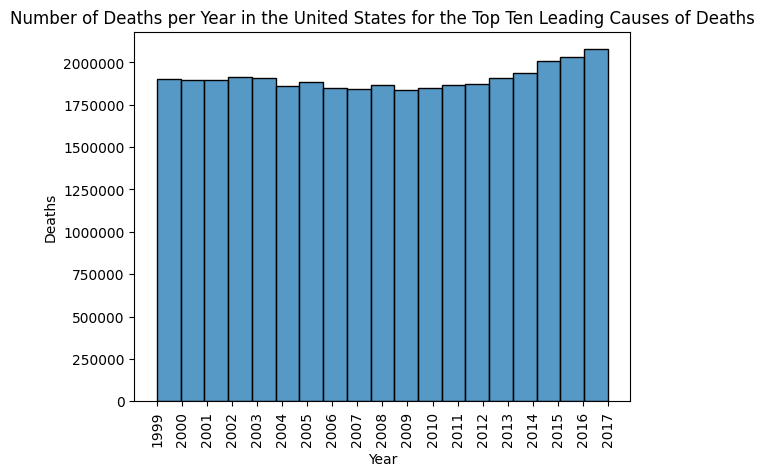

In [ ]:

# Plot histogram with pre-summed deaths as weights
sns.histplot(x='Year', weights='Deaths', data=yearlyDeathsDf, bins=len(yearlyDeathsDf['Year'].unique()))
plt.title('Number of Deaths per Year in the United States for the Top Ten Leading Causes of Deaths')
plt.xlabel('Year')
plt.ylabel('Deaths')

# Format y-axis to display numbers in full scale
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=90)

# Set x-axis ticks to be integers
plt.xticks(yearlyDeathsDf['Year'].astype(int))

plt.show()

This histoplot shows the relationship between the number of deaths per year for the top ten causes of deaths in the United States between the years 1999 to 2017. It highlights the number of deaths slowly increasing especially from 2009 to 2017

**Density Plot or KDE plot**
* We created a density plot that shows where most of the Age-adjusted Death Rate lies

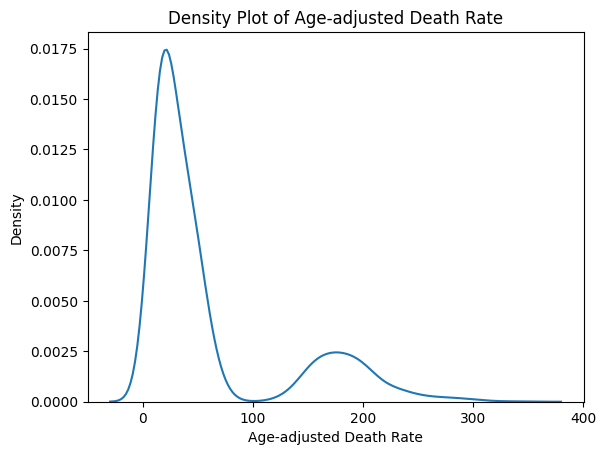

In [ ]:
# KDE plot of Age-adjusted Death Rate
sns.kdeplot(causesDf['Age-adjusted Death Rate'])
plt.title('Density Plot of Age-adjusted Death Rate')
plt.xlabel('Age-adjusted Death Rate')
plt.show()

* The density plot shows that between 0 and 100 is where most of the age-adjusted death rate lies. Other than between 0 and 100, theirs a slight peak in density at around the 180 mark.

**Count Plot**

* For this plot we created a second data frame that contained all data that did not include any row data under the State column with "United States", "District of Columbia" and under the Cause Name column where it was "All causes". We then created a scale variable to scale the data down by 1000. We then counted the number of occurences that each Cause Name occured and summated its value. Lastly we assorted the data into ascending order, then displayed the data using the countplot with the x axis as Cause Name, the data being the scaled data, and ordered in ascending order.

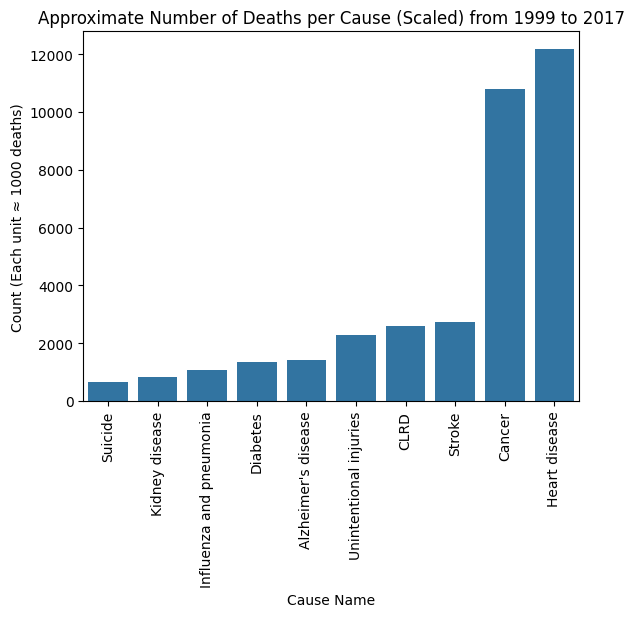

In [ ]:

# Scale down deaths by a factor (e.g., 1000) to reduce the size of the expanded DataFrame
scale_factor = 1000
causesDf["Scaled_Deaths"] = (causesDf["Deaths"] / scale_factor).round().astype(int)

# Expand rows based on scaled death counts
scaled_causesDf = causesDf.loc[causesDf.index.repeat(causesDf["Scaled_Deaths"])].reset_index(drop=True)

# Group by 'Cause Name' and count the occurrences (scaled deaths)
cause_counts = scaled_causesDf["Cause Name"].value_counts().reset_index()
cause_counts.columns = ['Cause Name', 'Count']

# Sort by 'Count' in ascending order
cause_counts_sorted = cause_counts.sort_values(by="Count", ascending=True)

# Plot using countplot with the sorted causes
sns.countplot(x="Cause Name", data=scaled_causesDf, order=cause_counts_sorted['Cause Name'])
plt.xticks(rotation=90)
plt.title('Approximate Number of Deaths per Cause (Scaled) from 1999 to 2017')
plt.xlabel('Cause Name')
plt.ylabel(f'Count (Each unit ≈ {scale_factor} deaths)')
plt.show()

* Analyzing the results, we can see that cancer and heart disease were the two leading causes of death in the United States from 1999 to 2017.

**Box Plot**

* We create a box plot for deaths using the scaled causes data frame

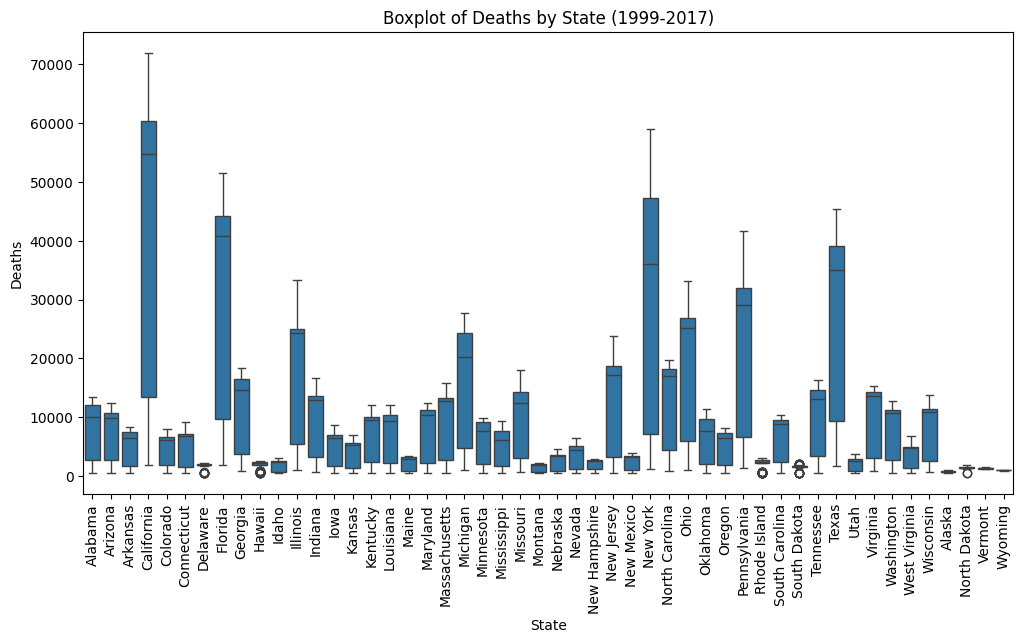

In [ ]:
# Create the box plot for 'Deaths' across all states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Deaths', data=scaled_causesDf)

# Set the title and labels
plt.title('Boxplot of Deaths by State (1999-2017)')
plt.xlabel('State')

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Boxplot of Deaths by State (1999-2017)')
plt.xlabel('State')
plt.ylabel('Deaths')

# Show the plot
plt.show()

* This graph is the box plot of Deaths for each state. This shows us that California has a lot more deaths on average than most but, this does not take into account that California has the highest population out of the 50 states.

**Box Plot 2**
* A box plot that uses Age-adjusted Death Rate rather than Deaths for more compariable data.

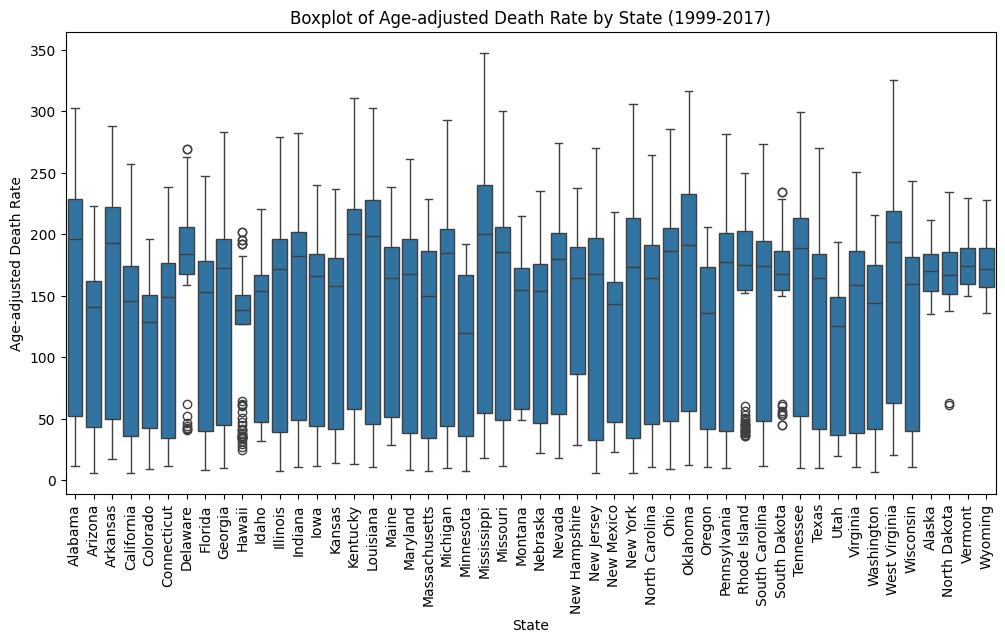

In [ ]:
# Create the box plot for 'Deaths' across all states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Age-adjusted Death Rate', data=scaled_causesDf)

# Set the title and labels
plt.title('Boxplot of Deaths by State (1999-2017)')
plt.xlabel('State')

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Boxplot of Age-adjusted Death Rate by State (1999-2017)')
plt.xlabel('State')
plt.ylabel('Age-adjusted Death Rate')

# Show the plot
plt.show()

* In this box plot rather than calculating the deaths for each state as the chart above does, this uses the Age-adjusted death rate, a value calculated using the ages and total population of the state to make a value that takes in account that diffrent ages have diffrent chances of dying and also takes in consideration that each state has a diffrent population. This graph unlike the graph above shows that Missisippi has both the highest ever and highest average Age-adjusted death rate. Compared to the other graph that shows that California has the most deaths and most total deaths. We can also see that there are several outliers for example Hawaii has several values out of the average and needs to be looked into.

**Violin Plot**
* We created a violin plot to display the frequency distribution of the Age-adjusted death rates.

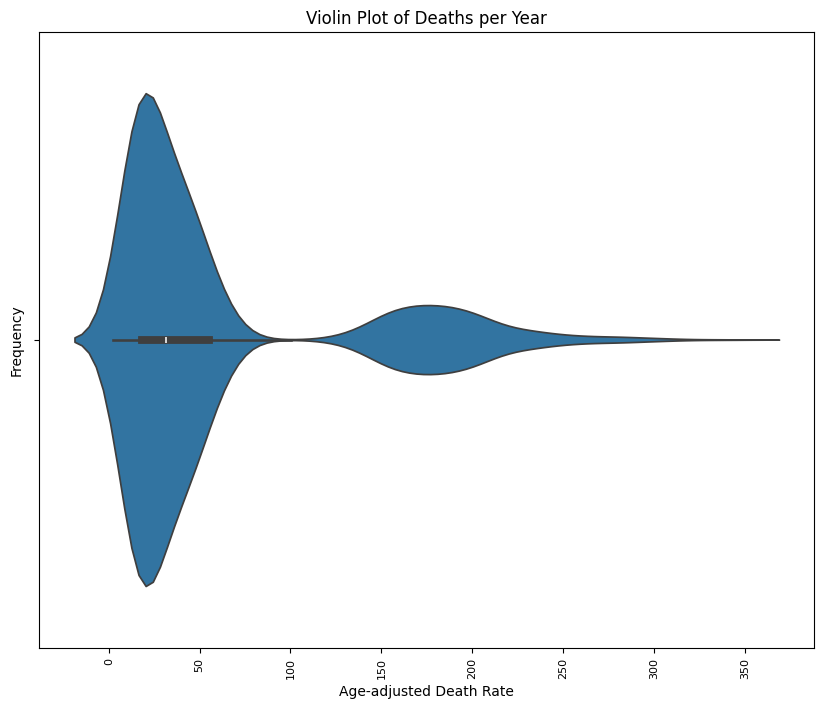

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Age-adjusted Death Rate',data=causesDf)
plt.xticks(rotation=90,fontsize=8)
plt.title('Violin Plot of Deaths per Year')
plt.xlabel('Age-adjusted Death Rate')
plt.ticklabel_format(axis='x', style='plain')

plt.ylabel('Frequency')
plt.show()

* In the violin plot above, we can observe that the Age-adjusted death rate is most frequent between the ranges of 0 to 50 and 150 to 200.

# (3)Show an example of each of the following two feature plots on the  dataset. Use hue, style, and size parameters  as well.  Explain the results of each plot briefly.

**Scatter Plot**
*   For our scatter plot we created a new DataFrame, average_death_ratedf, that shows the average number of deaths for each state and cause. We then put that into the scatter plot with deaths as the X value and Cause Name as the Y value.



Text(0, 0.5, 'Cause Name')

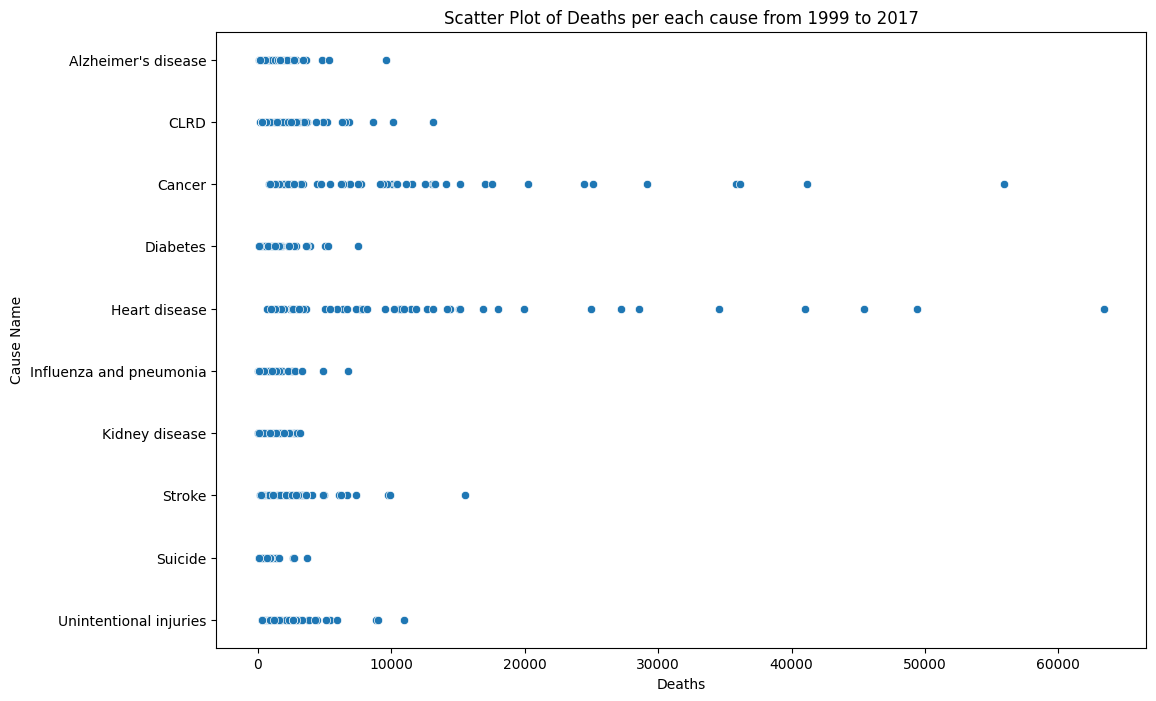

In [ ]:
average_death_ratedf = causesDf.groupby(['State', 'Cause Name'])['Deaths'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=average_death_ratedf, x='Deaths', y='Cause Name')
plt.title('Scatter Plot of Deaths per each cause from 1999 to 2017')
plt.xlabel('Deaths')
plt.ylabel('Cause Name')


* From the results of the scatter plot we can analyze the amount of deaths from each cause from the time period 1999 to 2017. You can see in the data that suicide and kidney disease are the least causes of death from 1999 to 2017

**Swarm Plot**
* for the swarm plot we used a sample size of 100 and passed in the cause name and age-adjusted death rate

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


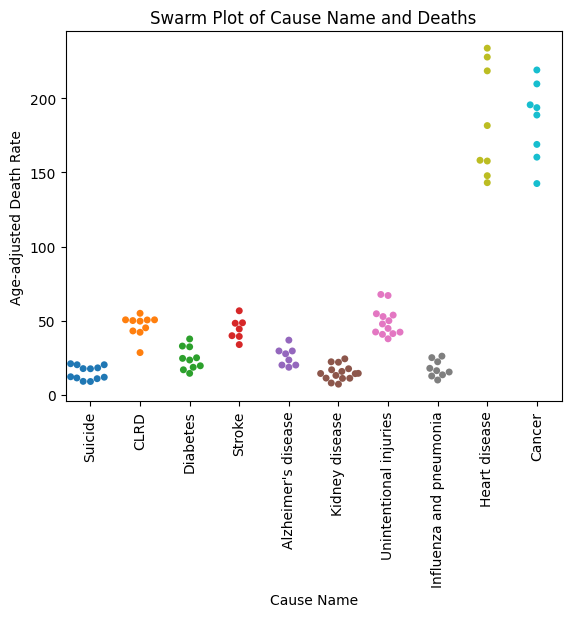

In [ ]:
causesDf_reduced = causesDf.sample(n=100)

sns.swarmplot(data=causesDf_reduced, x='Cause Name', y='Age-adjusted Death Rate', hue='Cause Name')
plt.title('Swarm Plot of Cause Name and Deaths')  # Correct title
plt.xlabel('Cause Name')  # Adjusted x-axis label
plt.ylabel('Age-adjusted Death Rate')

# If you want to adjust the x-ticks, you can set them based on 'Cause Name' (or leave it out)
plt.xticks(rotation=90)  # Rotates the x-ticks if they are too crowded

# Keep the y-ticks as they are, or you can adjust them if needed
plt.ticklabel_format(axis='y', style='plain')

plt.show()

This plot is really good for showing where most of our data lies between the age-adjusted death rates for instance, cancer and heart disease both have mainly high age-adjusted death rates, while every other points seems to cluster at the bottom, which indicates their data consist of mainly low age-adjusted death rates.

**Strip Plot**

*   For the strip plot we reduced the sample down to 5000, then used the deaths and cause name to pass into the strip plot


Text(0, 0.5, 'Cause Name')

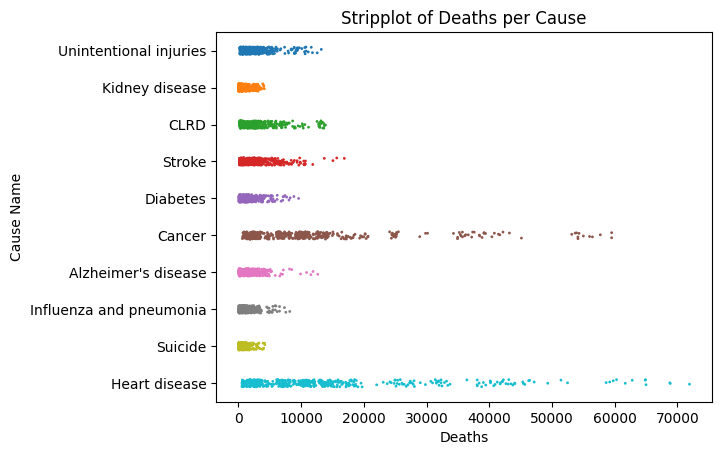

In [ ]:
causesReducedSample = causesDf.sample(n=5000)
sns.stripplot(data=causesReducedSample, x='Deaths', y='Cause Name', hue = 'Cause Name', size = 2)
plt.title('Stripplot of Deaths per Cause')
plt.xlabel('Deaths')
plt.ylabel('Cause Name')


* The strip plot is good at showing that for most causes, the amount of deaths is between the 0 to 20000 range but for diseases such as cancer and heart disease, some of the deaths reach up to 30000 to 70000 range

# Exploritory Data Analysis

In [ ]:
# Size of the dataset
print(f"Dataset size (rows, columns): {df.shape}")

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Dataset size (rows, columns): (10659, 6)
Numerical features: Index(['Year', 'Deaths', 'Age-adjusted Death Rate', 'Population'], dtype='object')
Categorical features: Index(['Cause Name', 'State'], dtype='object')


                             Year    Deaths  Age-adjusted Death Rate  \
Year                     1.000000  0.012093                -0.038752   
Deaths                   0.012093  1.000000                 0.636900   
Age-adjusted Death Rate -0.038752  0.636900                 1.000000   
Population               0.043036  0.371418                -0.009420   

                         Population  
Year                       0.043036  
Deaths                     0.371418  
Age-adjusted Death Rate   -0.009420  
Population                 1.000000  


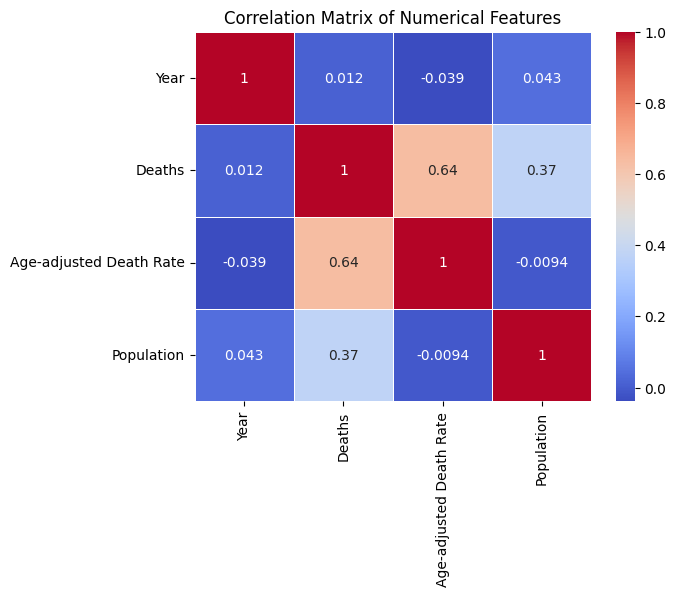

In [ ]:
correlation = df[numerical_features].corr()
print(correlation)

# Plot heatmap of correlations
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# (4) Summarize the dataset using the following methods.

**Df.shape()**
* Df.shape() will return df's dimensions in this way. (number of instances, number of feaatures)

In [ ]:
df.shape

(10659, 6)

As we can see from the output, there are 10,659 instances and 6 features.

**Df.info()**
* Df.info() will display the name, number of non-null values, and type of each feature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10659 entries, 0 to 10658
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10659 non-null  int64  
 1   Cause Name               10659 non-null  object 
 2   State                    10659 non-null  object 
 3   Deaths                   10659 non-null  int64  
 4   Age-adjusted Death Rate  10659 non-null  float64
 5   Population               10659 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 499.8+ KB


As we can see, the ouput is gives us a graph of the column names, number of non-null values in each column, and the type of each columns value.

**Df.describe(include='all')**
* Df.describe(include='all') will display statistics such as count, mean, standard deviation, min/max, and quartiles for each numerical feature. With the "include = "all"", it will also display the count, number of categories, mode's name, and frequency for categorical features.

In [ ]:
df.describe(include='all')

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Population
count,10659.000000,10659,10659,10659.000000,10659.000000,1.065900e+04
unique,NaN,11,51,NaN,NaN,NaN
top,NaN,Unintentional injuries,Alabama,NaN,NaN,NaN
freq,NaN,969,209,NaN,NaN,NaN
mean,2008.000000,NaN,NaN,7881.522845,127.603931,5.937998e+06
std,5.477483,NaN,NaN,21021.084928,223.741077,6.653544e+06
min,1999.000000,NaN,NaN,21.000000,2.600000,4.796020e+05
25%,2003.000000,NaN,NaN,599.500000,19.200000,1.611206e+06
50%,2008.000000,NaN,NaN,1668.000000,35.800000,4.143625e+06
75%,2013.000000,NaN,NaN,5091.500000,151.450000,6.742830e+06


As shown above, the columns represent the six features of the dataset, while the rows display various statistical summaries: count, unique, top, frequency, mean, standard deviation (std), minimum, 25th percentile (25% quartile), median (50% quartile), 75th percentile (75% quartile), and maximum value. These measures provide a comprehensive overview of the distribution and characteristics of each feature in the dataset.

# (5) Show examples of the following visualization methods on selected dataset columns. Try to interpret the results that are interesting and useful.

**Df.hist()**
* We created two histograms to display the distribution of Age-adjusted death rates and the number of Deaths across the dataset.

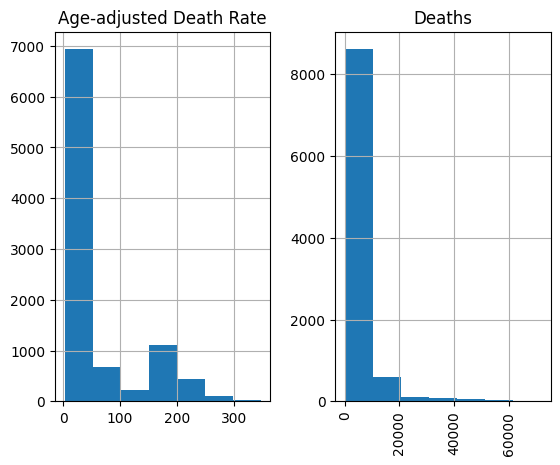

In [ ]:
# Plot histogram to see distribution shape
causesDf[['Age-adjusted Death Rate', 'Deaths']].hist(bins=7)

plt.xticks(rotation=90)  # Rotates the x-ticks if they are too crowded
plt.show()

The two histograms illustrate that the Age-adjusted death rate primarily falls between 0 and 50, with some outliers extending from 50 to 300. A similar pattern is observed for the number of deaths, where the majority of deaths across states between 1997 and 2017 are concentrated within the 0 to 10,000 range. However, in a few rare instances, the number of deaths reaches as high as 60,000.

**Df.boxplot()**
* Below are the boxplots for each numerical data type within the dataset. We opted to create separate boxplots for each variable rather than a single combined plot due to the distinct nature of the data each represents. For the boxplot of "Deaths from Each Cause," we excluded the top 15% of outliers, focusing on the top 85% of the data. This approach helps to minimize the influence of extreme outliers, resulting in a clearer and more meaningful visualization without excessive compression.

Text(0.5, 1.0, 'Boxplot of Populaion')

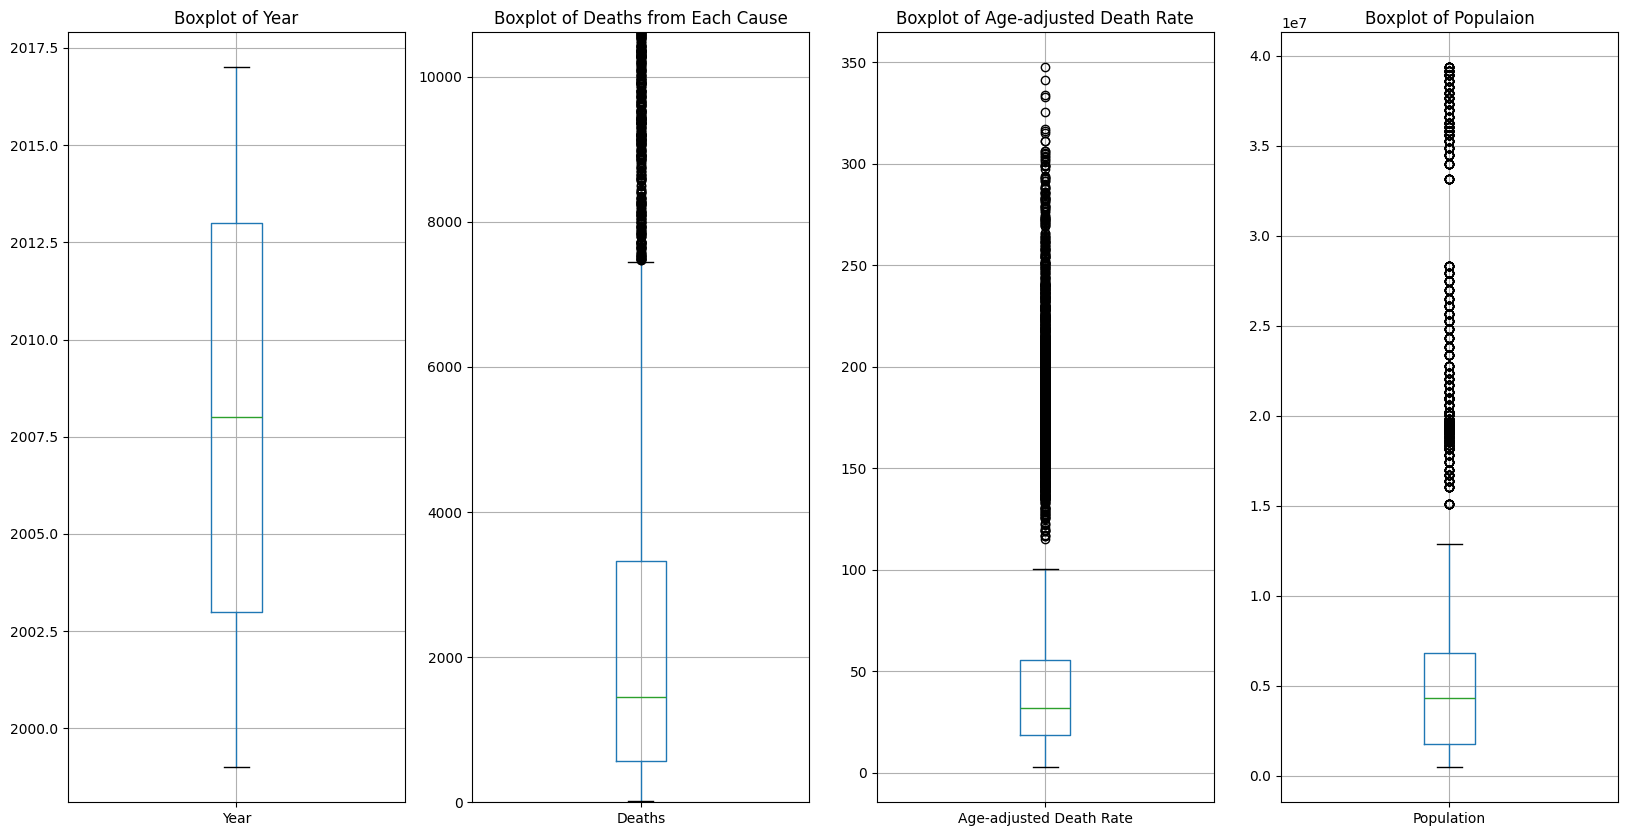

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

causesDf[['Year']].boxplot(ax=axes[0])
axes[0].set_title('Boxplot of Year')

causesDf[['Deaths']].boxplot(ax=axes[1])
axes[1].set_title('Boxplot of Deaths from Each Cause')
axes[1].set_ylim(0, df['Deaths'].quantile(0.85))

causesDf[['Age-adjusted Death Rate']].boxplot(ax=axes[2])
axes[2].set_title('Boxplot of Age-adjusted Death Rate')

causesDf[['Population']].boxplot(ax=axes[3])
axes[3].set_title('Boxplot of Populaion')

As observed, each graph presents a boxplot with the corresponding y-axis values representing the data range for each variable. The boxplots highlight key statistical measures, including the lower quartile, median, upper quartile, minimum, and maximum values for each cause. From the visualizations, it is evident that there are numerous outliers in both population deaths and age-adjusted death rates. However, these outliers are likely attributed to the specific locations or populations from which the data originated, suggesting that geographic or demographic factors may be influencing the results.

**Pd.plotting.scatter_matrix()**
* For the scatter matrix, we used the causesDF dataset, which excludes entries labeled as "United States" and "All Causes". This preprocessing ensures that the x and y relationships more accurately reflect individual causes, rather than being skewed by the aggregated values of "United States" or "All Causes", which represent totals for each category. This approach provides a clearer representation of the data and prevents these aggregate entries from distorting the ratios.

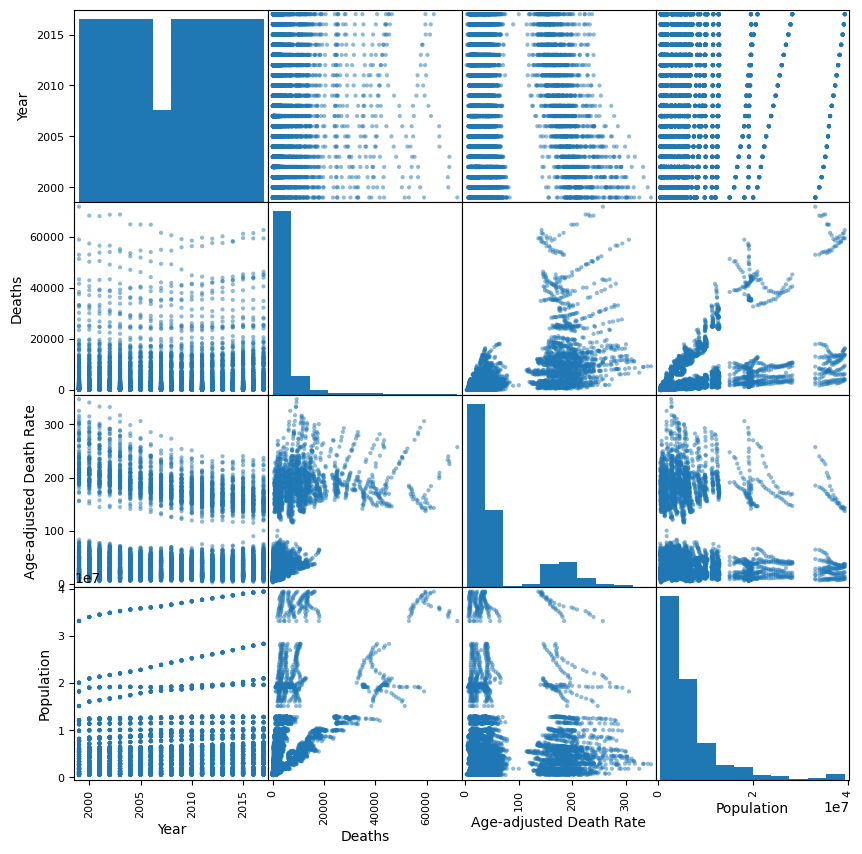

In [ ]:
pd.plotting.scatter_matrix(causesDf[['Year', 'Deaths', 'Age-adjusted Death Rate', 'Population']], figsize=(10, 10))
plt.show()

The scatter matrix above illustrates the pairwise relationships between the variables "Population", "Age-adjusted Death Rate", "Deaths", and "Year". This visualization helps reveal correlations and patterns within the data. For instance, the graph highlights the relationship between "Population" and "Deaths", where both increase in tandem, suggesting a potential linear correlation that could be used for predictive modeling.

# (6) Try to find outliers in the dataset such as the following, show examples, and show how you are cleaning them.

In [ ]:
num_rows = len(df)
print(num_rows)

10659


**Df.drop_dubplicates()**
* The df.drop_duplicates() function removes duplicate rows, helping to ensure a clean and unique dataset.

In [ ]:
df.drop_duplicates()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Population
0,2017,Unintentional injuries,Alabama,2703,53.8,4874486
1,2017,Unintentional injuries,Alaska,436,63.7,739700
2,2017,Unintentional injuries,Arizona,4184,56.2,7044008
3,2017,Unintentional injuries,Arkansas,1625,51.8,3001345
4,2017,Unintentional injuries,California,13840,33.2,39358497
...,...,...,...,...,...,...
10654,1999,Kidney disease,Virginia,1035,16.9,6872912
10655,1999,Kidney disease,Washington,278,5.2,5756361
10656,1999,Kidney disease,West Virginia,345,16.4,1806928
10657,1999,Kidney disease,Wisconsin,677,11.9,5250446


In [ ]:
num_rows = len(df)
print(num_rows)

10659


No duplicate rows were identified or removed, as evidenced by the row count remaining consistent at 10,659 before and after applying the df.drop_duplicates() function.

**Df.dropna()**
* The df.dropna() function removes any row containing missing (N/A) values from the dataset

In [ ]:
df.dropna()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Population
0,2017,Unintentional injuries,Alabama,2703,53.8,4874486
1,2017,Unintentional injuries,Alaska,436,63.7,739700
2,2017,Unintentional injuries,Arizona,4184,56.2,7044008
3,2017,Unintentional injuries,Arkansas,1625,51.8,3001345
4,2017,Unintentional injuries,California,13840,33.2,39358497
...,...,...,...,...,...,...
10654,1999,Kidney disease,Virginia,1035,16.9,6872912
10655,1999,Kidney disease,Washington,278,5.2,5756361
10656,1999,Kidney disease,West Virginia,345,16.4,1806928
10657,1999,Kidney disease,Wisconsin,677,11.9,5250446


In [ ]:
num_rows = len(df)
print(num_rows)

10659


As observed, the row count remains at 10,659, confirming that no rows contain missing (N/A) values.

**Df.isnull().sum()**
* The df.isnull().sum() method provides an efficient way to check for missing (N/A) values across all columns, allowing for a quick assessment of any null entries within the dataset.

In [ ]:
df.isnull().sum()

,0
Year,0
Cause Name,0
State,0
Deaths,0
Age-adjusted Death Rate,0
Population,0


As demonstrated, our dataset contains no missing (N/A) values across all entries.

**Other Cleaning Practices**
* Our dataset contained minimal outliers, such as missing values, duplicate entries, or other data inconsistencies. However, we identified two specific values — “United States” in the “State” column and “All Causes” in the “Cause Name” column that significantly impacted ratio calculations within our dataset. During testing, we observed that entries labeled as “United States” or “All Causes” skewed the representation of more granular data, as these values represent aggregate data that encompasses individual states or specific causes. Consequently, including these aggregated entries diminished the distinctiveness and accuracy of data for each state or cause. As a team, we decided to remove these values where testing may be skewed.